<a href="https://colab.research.google.com/github/Christianah001/Hackbio-biocoding-internship/blob/main/Stage_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# stage 1 task

# first function dna to protein
TP53_seq= "CTCAAAAGTCTAGAGCCACCGTCCAGGGAGCAGGTAGCTGCTGGGCTCCGGGGACACTTTGCGTTCGGGC"


def dna_to_protein(dna_sequence):
    codon_table = { 'ATA':'Isoleucine', 'ATC':'Isoleucine', 'ATT':'Isoleucine', 'ATG':'Methionine',
        'ACA':'Threonine', 'ACC':'Threonine', 'ACG':'Threonine', 'ACT':'Threonine',
        'AAC':'Asparagine', 'AAT':'Asparagine', 'AAA':'Lysine', 'AAG':'Lysine',
        'AGC':'Serine', 'AGT':'Serine', 'AGA':'Arginine', 'AGG':'Arginine',
        'CTA':'Leucine', 'CTC':'Leucine', 'CTG':'Leucine', 'CTT':'Leucine',
        'CCA':'Proline', 'CCC':'Proline', 'CCG':'Proline', 'CCT':'Proline',
        'CAC':'Histidine', 'CAT':'Histidine', 'CAA':'Glutamine', 'CAG':'Glutamine',
        'CGA':'Arginine', 'CGC':'Arginine', 'CGG':'Arginine', 'CGT':'Arginine',
        'GTA':'Valine', 'GTC':'Valine', 'GTG':'Valine', 'GTT':'Valine',
        'GCA':'Alanine', 'GCC':'Alanine', 'GCG':'Alanine', 'GCT':'Alanine',
        'GAC':'Aspartic acid', 'GAT':'Aspartic acid', 'GAA':'Glutamic acid', 'GAG':'Glutamic acid',
        'GGA':'Glycine', 'GGC':'Glycine', 'GGG':'Glycine', 'GGT':'Glycine',
        'TCA':'Serine', 'TCC':'Serine', 'TCG':'Serine', 'TCT':'Serine',
        'TTC':'Phenylalanine', 'TTT':'Phenylalanine', 'TTA':'Leucine', 'TTG':'Leucine',
        'TAC':'Tyrosine', 'TAT':'Tyrosine', 'TAA':'Stop', 'TAG':'Stop',
        'TGC':'Cysteine', 'TGT':'Cysteine', 'TGA':'Stop', 'TGG':'Tryptophan',    }
    protein_sequence = ""
    for i in range(0, len(dna_sequence), 3):
        codon = dna_sequence[i:i+3]
        protein_sequence += codon_table.get(codon, "") +"-"
    return protein_sequence.rstrip("-")
dna_to_protein(TP53_seq)


'Leucine-Lysine-Serine-Leucine-Glutamic acid-Proline-Proline-Serine-Arginine-Glutamic acid-Glutamine-Valine-Alanine-Alanine-Glycine-Leucine-Arginine-Glycine-Histidine-Phenylalanine-Alanine-Phenylalanine-Glycine'

   Time  Population  Lag_Phase  Exp_Phase  Curve_ID
0     0        10.0          4         15         0
1     1        10.0          4         15         0
2     2        10.0          4         15         0
3     3        10.0          4         15         0
4     4        10.0          4         15         0


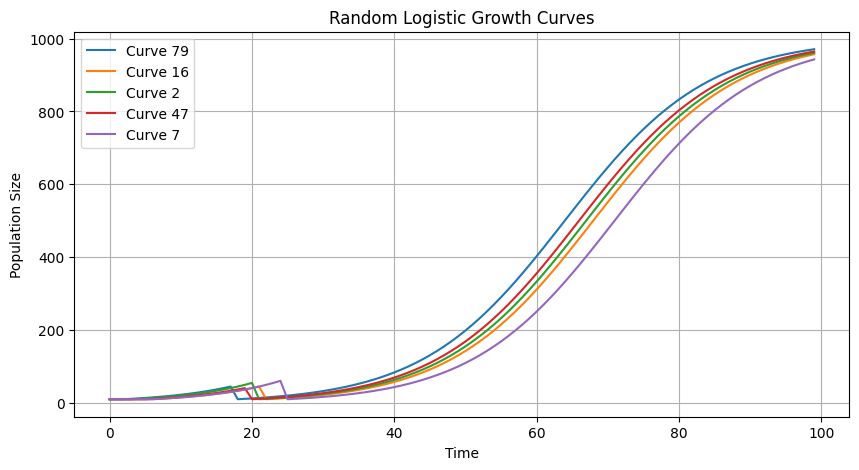

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Second function, Logistic Growth Function
def logistic_growth_curve(N_initial, r, K, time_steps=100):
    """Simulates logistic growth with randomized lag and exponential phase durations."""
    lag_phase_length = random.randint(1, 10)  # Random lag phase length
    exponential_phase_length = random.randint(15, 20)  # Random exponential phase length

    population = []

    for t in range(time_steps):
        # Lag phase
        if t < lag_phase_length:
            N_t = N_initial
        # Exponential phase
        elif t < (lag_phase_length + exponential_phase_length):
            N_t = N_initial * np.exp(r * (t - lag_phase_length))
        # Logistic phase
        else:
            N_t = K / (1 + ((K - N_initial) / N_initial) * np.exp(-r * (t - lag_phase_length - exponential_phase_length)))

        population.append(N_t)

    return pd.DataFrame({"Time": range(time_steps), "Population": population,
                         "Lag_Phase": [lag_phase_length] * time_steps,
                         "Exp_Phase": [exponential_phase_length] * time_steps})

# Function to Generate Multiple Growth Curves
def generate_growth_curves(num_curves=100, time_steps=100):
    """Generates multiple logistic growth curves with different random lag and exponential phases."""
    all_curves = []

    for i in range(num_curves):
        df = logistic_growth_curve(N_initial=10, r=0.1, K=1000, time_steps=time_steps)
        df["Curve_ID"] = i
        all_curves.append(df)

    return pd.concat(all_curves, ignore_index=True)

#  Now we can generate 100 growth curves without error
df_all_growth = generate_growth_curves()
print(df_all_growth.head())

# Plot a few random growth curves
plt.figure(figsize=(10,5))
for i in np.random.choice(df_all_growth["Curve_ID"].unique(), 5, replace=False):
    subset = df_all_growth[df_all_growth["Curve_ID"] == i]
    plt.plot(subset["Time"], subset["Population"], label=f"Curve {i}")

plt.xlabel("Time")
plt.ylabel("Population Size")
plt.title("Random Logistic Growth Curves")
plt.legend()
plt.grid()
plt.show()

# github profile for team
# Ogunoye Blessing's Github page: https://github.com/to-ibukun
# Obakpolo Charis-Grace Github page: https://github.com/CeeGeeObas
# Funmilayo Ligali's Github page: https://github.com/Christianah001
# Fatemah Alsolaiman's Github page: https://github.com/92Faty

In [ ]:
# forth function for determining the time to reach 80% of the maximum growth; usually the carrying capacity
import numpy as np

def time_to_reach_80_percent(N_initial, r, K, lag_phase_length, exponential_phase_length, time_steps=200):
    """Finds the time at which the population reaches 80% of the carrying capacity."""
    threshold = 0.8 * K  # 80% of carrying capacity
    population = []

    for t in range(time_steps):
        # Lag phase
        if t < lag_phase_length:
            N_t = N_initial
        # Exponential phase
        elif t < (lag_phase_length + exponential_phase_length):
            N_t = N_initial * np.exp(r * (t - lag_phase_length))
        # Logistic phase
        else:
            N_t = K / (1 + ((K - N_initial) / N_initial) * np.exp(-r * (t - lag_phase_length - exponential_phase_length)))

        population.append(N_t)


        if N_t >= threshold:
            return t

    return None

time_reached = time_to_reach_80_percent(N_initial=10, r=0.1, K=1000, lag_phase_length=2, exponential_phase_length=15)
print(f"Time to reach 80% of carrying capacity: {time_reached} minutes")


Time to reach 80% of carrying capacity: 77 minutes


In [ ]:
# fifth function hamming distance.
def hamming_distance(str1, str2):
    """Calculates the Hamming distance between two strings, padding the shorter one if necessary."""
    max_length = max(len(str1), len(str2))


    str1 = str1.ljust(max_length)
    str2 = str2.ljust(max_length)

    # Counting the number of differing characters
    distance = sum(c1 != c2 for c1, c2 in zip(str1, str2))
    return distance


name1 = "Funmilayo Ligali"
name2 = "Christianah001"

hamming_dist = hamming_distance(name1, name2)
print(f"Hamming distance between '{name1}' and '{name2}': {hamming_dist}")

Hamming distance between 'Funmilayo Ligali' and 'Christianah001': 16
